# Explore here

In [2]:
import pandas as pd

# URL del dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"

# Cargar los datos directamente desde la URL
df = pd.read_csv(url)

# Guardarlo en la carpeta data/raw
df.to_csv("/workspaces/LucasDellaMaestra-RegresionLineal/data/raw/dataset.csv", index=False)

# Verificar que se cargó bien
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


# Procesamiento de Datos

In [3]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# OneHotEncoding para variables categóricas
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Definir variables predictoras (X) y la variable objetivo (y)
X = df.drop(columns=['charges'])  # Todas menos el target
y = df['charges']

# Escalar las variables numéricas
scaler = StandardScaler()
X[['age', 'bmi', 'children']] = scaler.fit_transform(X[['age', 'bmi', 'children']])

# Ver el dataset preprocesado
print(X.head())


        age       bmi  children  sex_male  smoker_yes  region_northwest  \
0 -1.438764 -0.453320 -0.908614     False        True             False   
1 -1.509965  0.509621 -0.078767      True       False             False   
2 -0.797954  0.383307  1.580926      True       False             False   
3 -0.441948 -1.305531 -0.908614      True       False              True   
4 -0.513149 -0.292556 -0.908614      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


#### Distribución de la variable objetivo

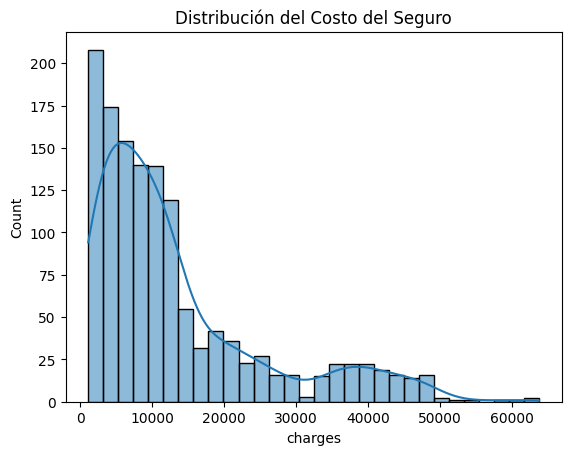

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['charges'], kde=True)
plt.title("Distribución del Costo del Seguro")
plt.show()


#### Ver la correlación entre variables

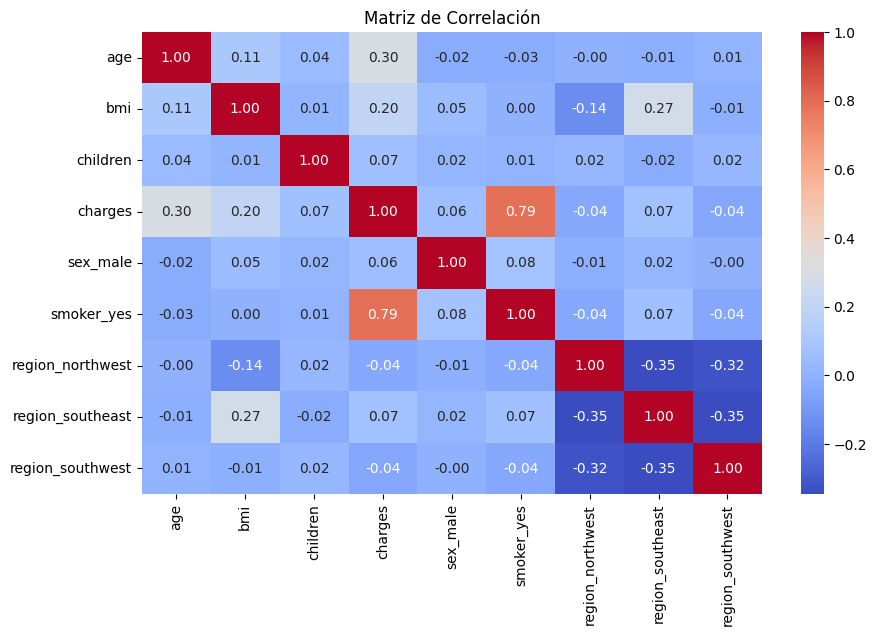

In [5]:
import numpy as np

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


#### Detección de outliers

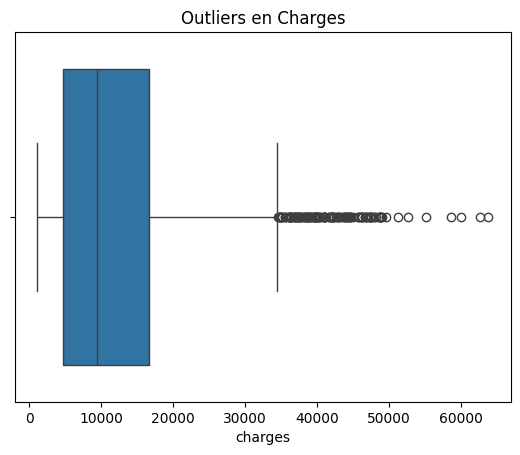

In [6]:
sns.boxplot(x=df['charges'])
plt.title("Outliers en Charges")
plt.show()


# Separo variables para entrenar y testear

In [7]:
from sklearn.model_selection import train_test_split

# Separar 80% entrenamiento y 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ver tamaños de los datasets
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (1070, 8), Test: (268, 8)


# Modelo de Regresión Lineal

In [8]:
from sklearn.linear_model import LinearRegression

# Crear modelo
modelo = LinearRegression()

modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluamos el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 4181.19
MSE: 33596915.85
R² Score: 0.78


#### Gráficos para análisis

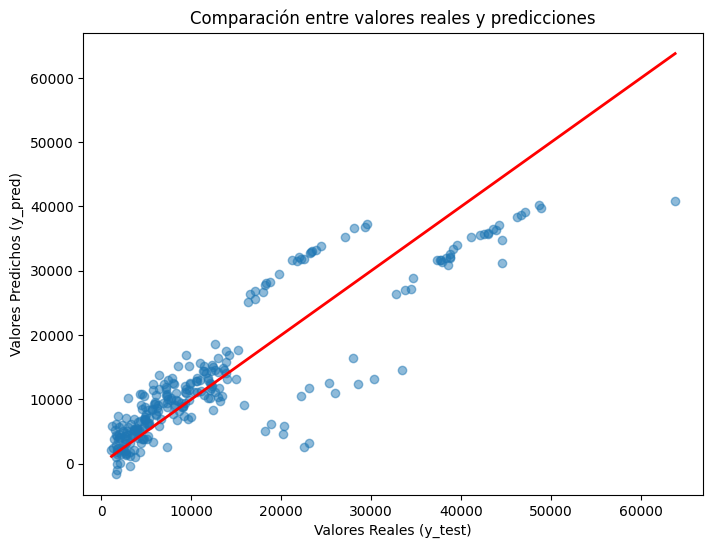

In [ ]:
#Dispersión: valores reales vs. predichos

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2) # Línea ideal
plt.xlabel("Valores Reales (y_test)")
plt.ylabel("Valores Predichos (y_pred)")
plt.title("Comparación entre valores reales y predicciones")
plt.show()

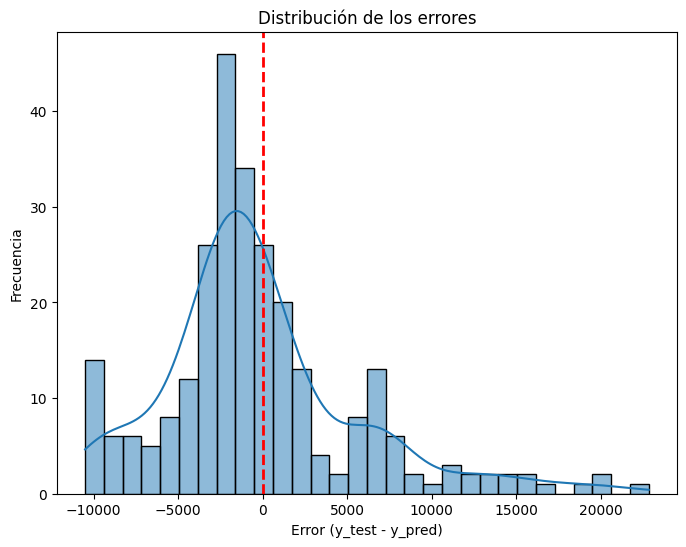

In [11]:
#  Histograma de errores 

errores = y_test - y_pred

plt.figure(figsize=(8,6))
sns.histplot(errores, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Error (y_test - y_pred)")
plt.ylabel("Frecuencia")
plt.title("Distribución de los errores")
plt.show()

#### Guardar las predicciones

In [12]:
# Crear un DataFrame con los valores reales y predichos
df_predicciones = pd.DataFrame({"Real": y_test, "Predicho": y_pred})

# Guardar en CSV
df_predicciones.to_csv("predicciones.csv", index=False)